In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# import os
# from google.colab import drive

# # Remove the directory if it exists and is a directory
# if os.path.isdir('/content/drive'):
#     !rm -r /content/drive

# drive.mount('/content/drive')

In [3]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [5]:
df.shape

(1000, 2)

In [6]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [7]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


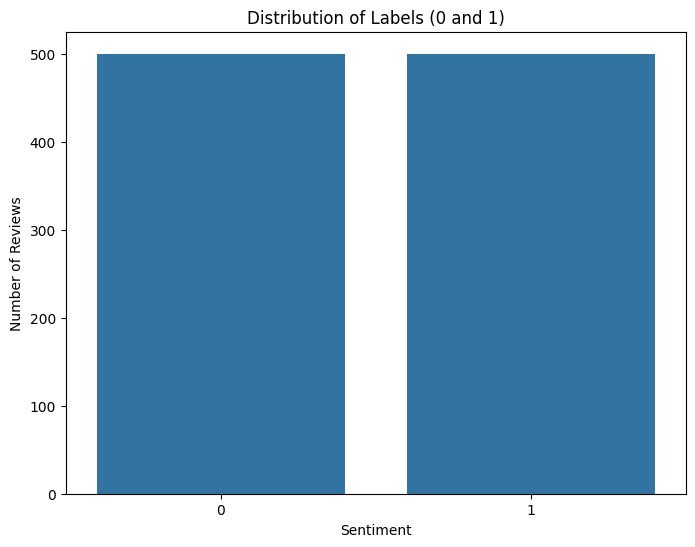

In [8]:
# 1. Distribution of labels (0 and 1)
plt.figure(figsize=(8, 6))
sns.countplot(x='Liked', data=df)
plt.title('Distribution of Labels (0 and 1)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


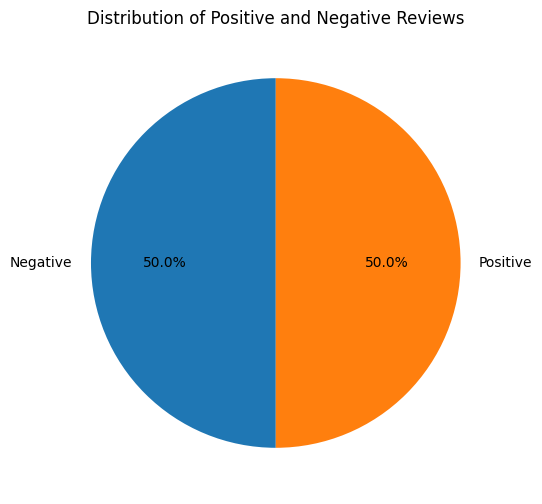

In [9]:
# Plot Pie chart for label distribution
label_counts = df['Liked'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=['Negative', 'Positive'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Positive and Negative Reviews')
plt.show()

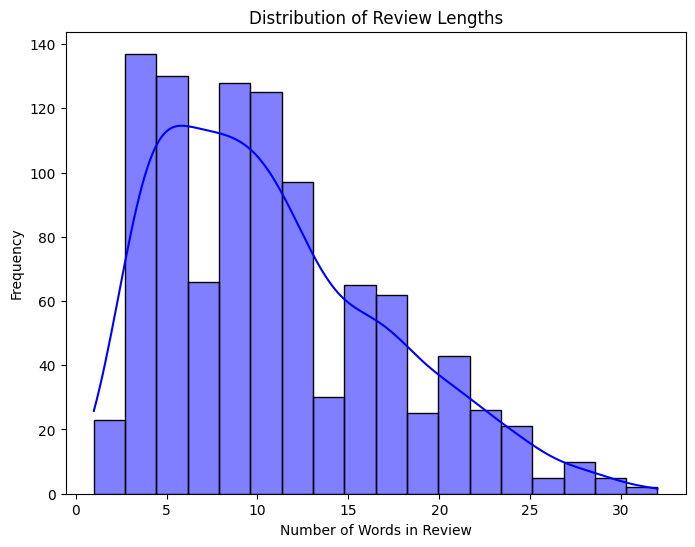

In [10]:
# 2. Distribution of review lengths
df['Review_length'] = df['Review'].apply(lambda x: len(str(x).split())) #  split بيجيب الطول بتاع كل جمله عن طريق انه بيعمل

plt.figure(figsize=(8, 6))
sns.histplot(df['Review_length'], kde=True, color='blue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words in Review')
plt.ylabel('Frequency')
plt.show()

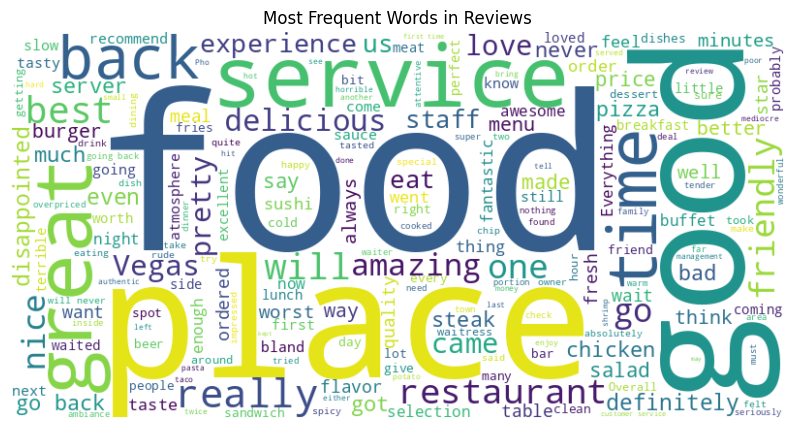

In [11]:
# Word Cloud for all reviews
all_reviews = ' '.join(df['Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Frequent Words in Reviews')
plt.axis('off')
plt.show()


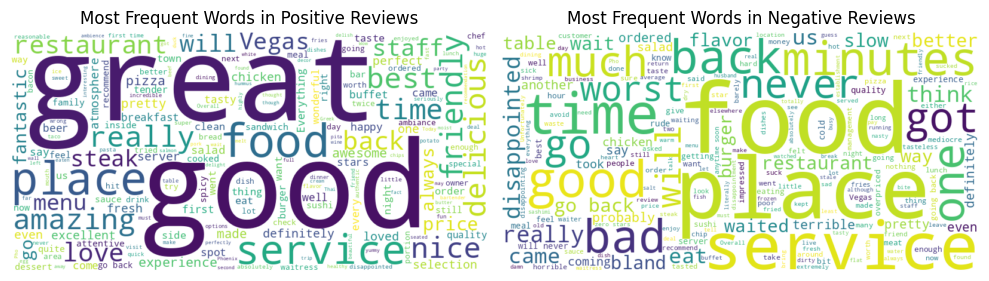

In [12]:
# Reviews with label 1 (positive)
positive_reviews = ' '.join(df[df['Liked'] == 1]['Review'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Reviews with label 0 (negative)
negative_reviews = ' '.join(df[df['Liked'] == 0]['Review'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plot both word clouds
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Most Frequent Words in Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Most Frequent Words in Negative Reviews')
plt.axis('off')

plt.tight_layout()
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.4 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


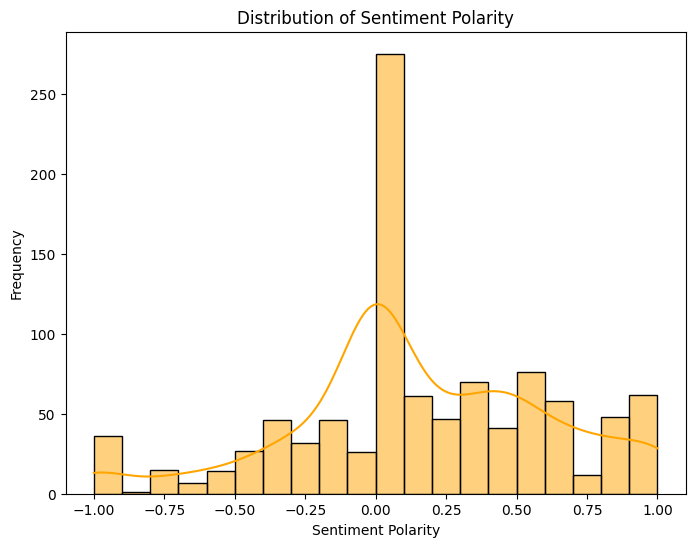

In [13]:
# Importing essential libraries for performing Natural Language Processing on 'Restaurant_Reviews.tsv' dataset
import nltk
import re
!pip install emoji

import emoji
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
# Apply sentiment analysis (polarity score)
df['Sentiment_Polarity'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment polarity distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Sentiment_Polarity'], kde=True, bins=20, color='orange')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Importing essential libraries for performing Natural Language Processing on 'Restaurant_Reviews.tsv' dataset
import nltk
import re
import emoji
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
# Cleaning the reviews
corpus = []
for i in range(0, 1000):

    # Removing emojis
    review = emoji.replace_emoji(df['Review'][i], replace='')

    # Cleaning special characters from the reviews
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=review)

    # Converting the entire review into lower case
    review = review.lower()

    # Correcting spelling (optional)
    review = str(TextBlob(review).correct())  # You can comment this line if you want to skip it

    # Tokenizing the review by words
    review_words = review.split()

    # Removing the stop words
    review_words = [word for word in review_words if word not in set(stopwords.words('english'))]

    # Lemmatizing the words instead of stemming
    lemmatizer = WordNetLemmatizer()
    review_words = [lemmatizer.lemmatize(word) for word in review_words if len(word) > 2]

    # Removing duplicates
    review_words = list(dict.fromkeys(review_words))

    # Stemming the words (optional, can be used if you prefer stemming)
    ps = PorterStemmer()
    review_words = [ps.stem(word) for word in review_words]

    # Joining the processed words
    review = ' '.join(review_words)

    # Creating a corpus
    corpus.append(review)


In [16]:
corpus[0:10]

['love place',
 'crust good',
 'tast textur nasti',
 'stop late may bank holiday rich steve recommend love',
 'select menu great price',
 'get angri want damn',
 'honestli tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fire great',
 'great touch']

In [17]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [19]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [20]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [21]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 77.0%
Precision score is: 0.77
Recall score is: 0.8


In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [23]:
cm

array([[72, 25],
       [21, 82]])

Text(95.72222222222221, 0.5, 'Actual values')

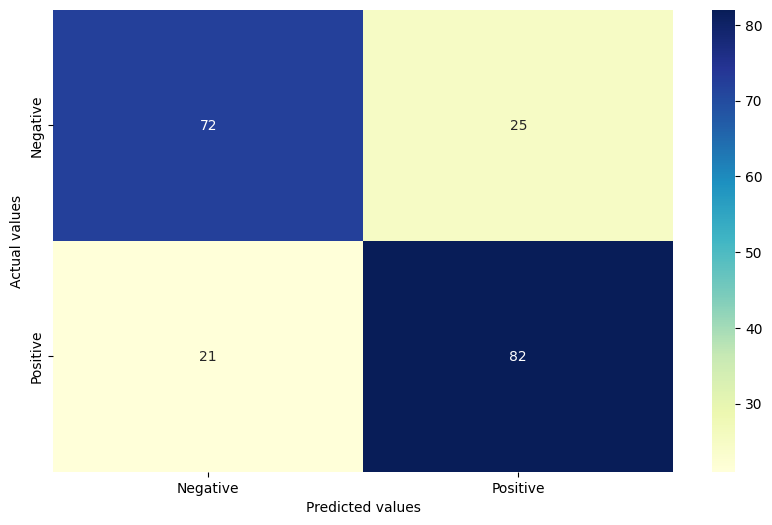

In [24]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [25]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 77.0%
Accuracy score for alpha=0.2 is: 76.5%
Accuracy score for alpha=0.3 is: 77.0%
Accuracy score for alpha=0.4 is: 77.0%
Accuracy score for alpha=0.5 is: 77.5%
Accuracy score for alpha=0.6 is: 77.0%
Accuracy score for alpha=0.7 is: 77.0%
Accuracy score for alpha=0.8 is: 77.0%
Accuracy score for alpha=0.9 is: 77.0%
Accuracy score for alpha=1.0 is: 77.0%
--------------------------------------------
The best accuracy is 77.5% with alpha value as 0.5


In [26]:
classifier = MultinomialNB(alpha=0.5)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.5)

In [27]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [28]:
# Predicting values
sample_review = 'The food is really good here.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [29]:
# Predicting values
sample_review = 'the meat is very well .'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [30]:
# Predicting values
sample_review = 'The food was absolutely wonderful, from preparation to presentation, very pleasing.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [31]:
!pip install gradio

In [32]:
import gradio as gr

def classify_review(text):
    try:
        is_positive = predict_sentiment(text)
        return "🟢 POSITIVE Review" if is_positive else "🔴 NEGATIVE Review"
    except Exception as e:
        return f"❌ Error: {str(e)}"

theme_color = "#4CAF50"  # green

with gr.Blocks(title="Sentiment Analysis App", theme=gr.themes.Monochrome(primary_hue="green")) as interface:
    gr.Markdown(
        """
        <h1 style="color:#4CAF50; text-align:center; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;">
            🧠 Sentiment Analysis Web App
        </h1>
        <p style="text-align:center; font-size:16px; color:#555; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;">
            Classify a customer review as <strong>Positive</strong> or <strong>Negative</strong> using a trained NLP model.
        </p>
        """,
        elem_id="header"
    )

    with gr.Row(elem_id="input_row"):
        with gr.Column(scale=1):
            review_input = gr.Textbox(
                label="Enter a Customer Review:",
                placeholder="Type or paste your customer review here...",
                lines=6,
                max_lines=12,
                interactive=True,
                elem_id="review_textbox",
            )
            submit_btn = gr.Button(
                "Analyze Sentiment",
                variant="primary",
                elem_id="submit_btn"
            )

        with gr.Column(scale=1):
            result_output = gr.Label(
                label="Prediction Result",
                elem_id="result_label"
            )

    submit_btn.click(fn=classify_review, inputs=review_input, outputs=result_output)

    gr.Markdown(
        """
        <hr style="margin-top:40px; margin-bottom:20px;">
        <p style="text-align:center; font-size:14px; color:#888; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;">
            Developed by <strong>Mostafa Osama</strong> | NLP Sentiment Classification Project
        </p>
        """,
        elem_id="footer"
    )

# Custom CSS for further polish with black background for output
interface.css = """
#header h1 {
    margin-bottom: 0;
}

#header p {
    margin-top: 4px;
    margin-bottom: 30px;
}

#review_textbox textarea {
    font-size: 16px;
    padding: 12px;
    border-radius: 8px;
    border: 1.5px solid #4CAF50;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
}

#submit_btn {
    margin-top: 15px;
    width: 100%;
    background-color: #4CAF50;
    font-weight: 600;
    font-size: 18px;
    border-radius: 8px;
    border: none;
    padding: 12px 0;
}

#submit_btn:hover {
    background-color: #45a049;
}

#result_label {
    font-size: 20px;
    font-weight: 600;
    color: white;
    padding: 20px;
    border-radius: 8px;
    border: 1.5px solid #4CAF50;
    text-align: center;
    min-height: 70px;
    background-color: black;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
}

#footer p {
    margin-top: 10px;
}
"""

interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a06e0a683076fce9bf.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
